In [11]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from matplotlib import animation
import random

In [2]:
gym.version.VERSION

'0.15.4'

In [3]:
!pip install JSAnimation

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [3]:
from JSAnimation.IPython_display import display_animation
from IPython.display import display, HTML

## 重新认识 cartpole 环境

- 小滑块/倒立摆
- 典型的 mdp（markov decision process）
    - 下一时刻的状态（转移）$s_{t+1}$ 只跟当前状态 $s_t$ 和（当前状态下采取的）$a_t$ 有关
- action space is discrete and finite
- state（observation）space is continuous

In [4]:
env = gym.make('CartPole-v0')

### state/space

In [5]:
# init space
env.reset()

array([-3.40156280e-02, -4.64929535e-05, -2.24331342e-02, -3.44344543e-02])

In [6]:
# action space
print(env.action_space)

Discrete(2)


In [7]:
print(env.action_space.n)

2


In [9]:
# observation space
# https://www.gymlibrary.dev/environments/classic_control/cart_pole/
print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)
print(env.observation_space.shape[0])

Box(4,)
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
4


### one episode

In [16]:
env = gym.make('CartPole-v0')
# observation = env.reset()
state = env.reset()
steps = 0
frames = []
while True:
    frames.append(env.render(mode='rgb_array'))
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    steps += 1
    print(f'step: {steps}, state: {state}')
    if done:
        break

step: 1, state: [-0.02012693  0.20925067  0.03958993 -0.29435305]
step: 2, state: [-0.01594191  0.40378649  0.03370287 -0.57429172]
step: 3, state: [-0.00786618  0.20820864  0.02221704 -0.27118479]
step: 4, state: [-0.00370201  0.01277682  0.01679334  0.02842187]
step: 5, state: [-0.00344647 -0.18258188  0.01736178  0.32635562]
step: 6, state: [-0.00709811  0.01228863  0.02388889  0.03919801]
step: 7, state: [-0.00685234 -0.18316759  0.02467285  0.33932136]
step: 8, state: [-0.01051569 -0.37863177  0.03145928  0.63968147]
step: 9, state: [-0.01808833 -0.18396223  0.04425291  0.35706915]
step: 10, state: [-0.02176757 -0.37968447  0.05139429  0.66337121]
step: 11, state: [-0.02936126 -0.18531377  0.06466172  0.38730339]
step: 12, state: [-0.03306753  0.00883356  0.07240779  0.1156883 ]
step: 13, state: [-0.03289086 -0.18724716  0.07472155  0.43030799]
step: 14, state: [-0.03663581  0.00674154  0.08332771  0.16208459]
step: 15, state: [-0.03650098 -0.18946834  0.0865694   0.47984822]
step

In [17]:
frames

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [10]:
def display_frames_as_gif(frames, output):
    """
    Displays a list of frames as a gif, with controls
    以gif格式显示关键帧列，带有控件
    """
    
    fig = plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        img = patch.set_data(frames[i])
        return img   ## *** return是必须要有的 ***
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    
    anim.save(output)
    return HTML(anim.to_jshtml())  ## *** 返回一个HTML对象，以便被调用者显示。 ***
    # display(display_animation(anim, default_mode='loop'))

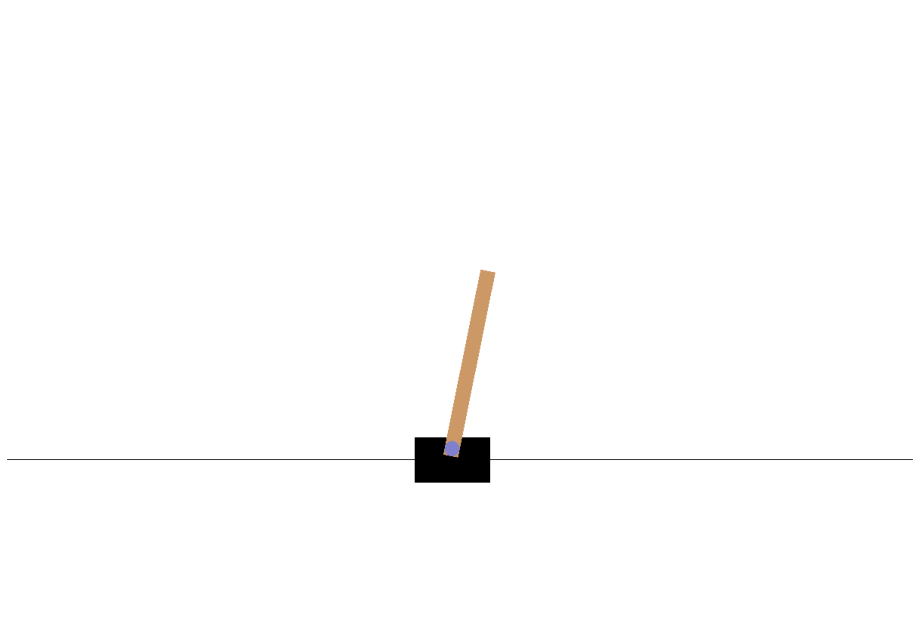

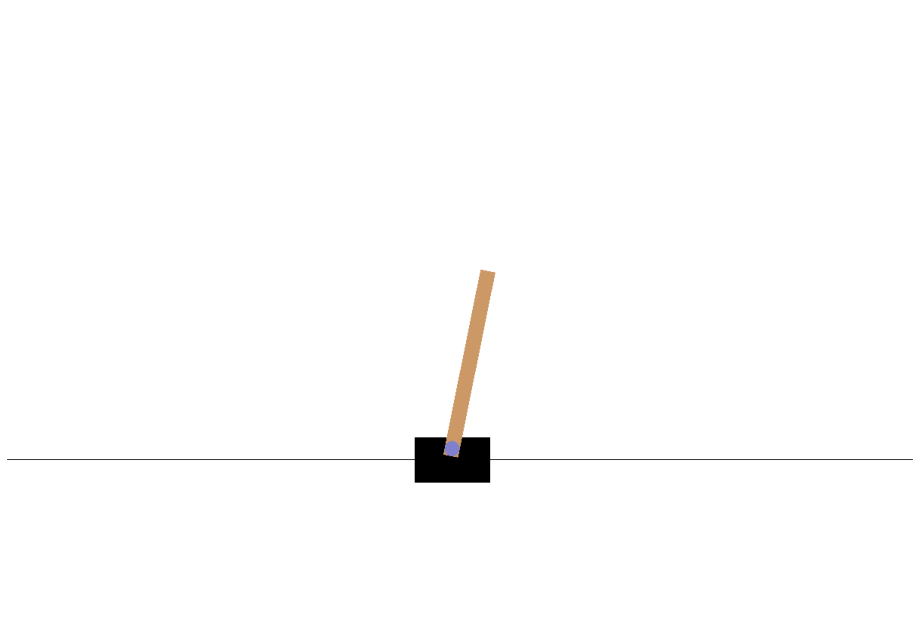

In [19]:
display_frames_as_gif(frames, output='./save/rand_cartpole.gif')
display_frames_as_gif(frames, output='./save/rand_cartpole.mp4')

## 状态离散化

In [20]:
NUM_DIGITIZED = 6

# 分桶， 5个值，对应 6 个分段，即 6 个桶 (0, 1, 2, 3, 4, 5)
def bins(clip_min, clip_max, num_bins=NUM_DIGITIZED):
    return np.linspace(clip_min, clip_max, num_bins+1)[1:-1]

# 按 6 进制映射将 4位 6 进制数映射为 id，
def digitize_state(observation):
    pos, cart_v, angle, pole_v = observation
    digitized = [np.digitize(pos, bins=bins(-2.4, 2.4, NUM_DIGITIZED)), 
                 np.digitize(cart_v, bins=bins(-3., 3, NUM_DIGITIZED)), 
                 np.digitize(angle, bins=bins(-0.418, 0.418, NUM_DIGITIZED)), 
                 np.digitize(pole_v, bins=bins(-2, 2, NUM_DIGITIZED))]
    # 3,1,2,4 (4位10进制数) = 4*10^0 + 2*10^1 + 1*10^2 + 3*10^3，最终的取值范围是 0-9999，总计 10^4 == 10000
    # a,b,c,d (4位6进制数) = d*6^0 + c*6^1 + b*6^2 + a*6^3，最终的取值范围是 0-`5555`(1295)，总计 6^4 == 1296
    ind = sum([d*(NUM_DIGITIZED**i) for i, d in enumerate(digitized)])
    return ind
    

In [21]:
obs = env.reset()

In [22]:
obs

array([ 0.04002152,  0.00259074, -0.03391407, -0.04418303])

In [22]:
bins(-2.4, 2.4, NUM_DIGITIZED)

array([-1.6, -0.8,  0. ,  0.8,  1.6])

## q-learning

In [22]:
class Agent:
    def __init__(self, action_space, n_states, eta=0.5, gamma=0.99, NUM_DIGITIZED=6):
        self.eta = 0.5
        self.gamme = gamma
        # Discrete(2)
        self.action_space = action_space
        self.NUM_DIGITIZED = NUM_DIGITIZED
        self.q_table = np.random.uniform(0, 1, size=(NUM_DIGITIZED**n_states, self.action_space.n))
        
    # 分桶， 5个值，对应 6 个分段，即 6 个桶 (0, 1, 2, 3, 4, 5)
    @staticmethod
    def _bins(clip_min, clip_max, num_bins):
        return np.linspace(clip_min, clip_max, num_bins+1)[1:-1]

    # 按 6 进制映射将 4位 6 进制数映射为 id，
    @staticmethod
    def _digitize_state(observation, NUM_DIGITIZED):
        pos, cart_v, angle, pole_v = observation
        digitized = [np.digitize(pos, bins=Agent._bins(-2.4, 2.4, NUM_DIGITIZED)), 
                     np.digitize(cart_v, bins=Agent._bins(-3., 3, NUM_DIGITIZED)), 
                     np.digitize(angle, bins=Agent._bins(-0.418, 0.418, NUM_DIGITIZED)), 
                     np.digitize(pole_v, bins=Agent._bins(-2, 2, NUM_DIGITIZED))]
        # 3,1,2,4 (4位10进制数) = 4*10^0 + 2*10^1 + 1*10^2 + 3*10^3，最终的取值范围是 0-9999，总计 10^4 == 10000
        # a,b,c,d (4位6进制数) = d*6^0 + c*6^1 + b*6^2 + a*6^3，最终的取值范围是 0-`5555`(1295)，总计 6^4 == 1296
        ind = sum([d*(NUM_DIGITIZED**i) for i, d in enumerate(digitized)])
        return ind

#     def update_q_table()
    def q_learning(self, obs, action, reward, obs_next):
        obs_ind = Agent._digitize_state(obs, self.NUM_DIGITIZED)
        obs_next_ind = Agent._digitize_state(obs_next, self.NUM_DIGITIZED)
        self.q_table[obs_ind, action] = self.q_table[obs_ind, action] + self.eta*(reward + max(self.q_table[obs_next_ind, :]) - self.q_table[obs_ind, action])
        
    def choose_action(self, state, episode):
        eps = 0.5*1/(episode + 1)
        state_ind = Agent._digitize_state(state, self.NUM_DIGITIZED)
        # epsilon greedy
        if random.random() < eps:
            action = self.action_space.sample()
        else:
            action = np.argmax(self.q_table[state_ind, :])
        return action

In [26]:
env = gym.make('CartPole-v0')
env.reset()
action_space = env.action_space
n_states = env.observation_space.shape[0]

agent = Agent(action_space, n_states)

max_episodes = 1000
max_steps = 200

continue_success_episodes = 0
learning_finish_flag = False

frames = []

for episode in range(max_episodes):
    obs = env.reset()
    for step in range(max_steps):
        if learning_finish_flag:
            frames.append(env.render(mode='rgb_array'))
        action = agent.choose_action(obs, episode)
        obs_next, _, done, _ = env.step(action)
        if done:
            if step < 195:
                reward = -1
                continue_success_episodes = 0
            else:
                reward = 1
                continue_success_episodes += 1
        else:
            reward = 0
        
        agent.q_learning(obs, action, reward, obs_next)
        
        if done:
            print(f'episode: {episode}, finish {step} time steps.')
            break
            
        obs = obs_next
        
    if learning_finish_flag:
        break
    if continue_success_episodes >= 10:
        learning_finish_flag = True
        print(f'continue success(step > 195) more than 10 times ')


episode: 0, finish 15 time steps.
episode: 1, finish 9 time steps.
episode: 2, finish 44 time steps.
episode: 3, finish 21 time steps.
episode: 4, finish 14 time steps.
episode: 5, finish 79 time steps.
episode: 6, finish 45 time steps.
episode: 7, finish 8 time steps.
episode: 8, finish 12 time steps.
episode: 9, finish 26 time steps.
episode: 10, finish 71 time steps.
episode: 11, finish 91 time steps.
episode: 12, finish 66 time steps.
episode: 13, finish 40 time steps.
episode: 14, finish 57 time steps.
episode: 15, finish 14 time steps.
episode: 16, finish 9 time steps.
episode: 17, finish 125 time steps.
episode: 18, finish 9 time steps.
episode: 19, finish 22 time steps.
episode: 20, finish 30 time steps.
episode: 21, finish 54 time steps.
episode: 22, finish 34 time steps.
episode: 23, finish 37 time steps.
episode: 24, finish 12 time steps.
episode: 25, finish 8 time steps.
episode: 26, finish 53 time steps.
episode: 27, finish 9 time steps.
episode: 28, finish 95 time steps.


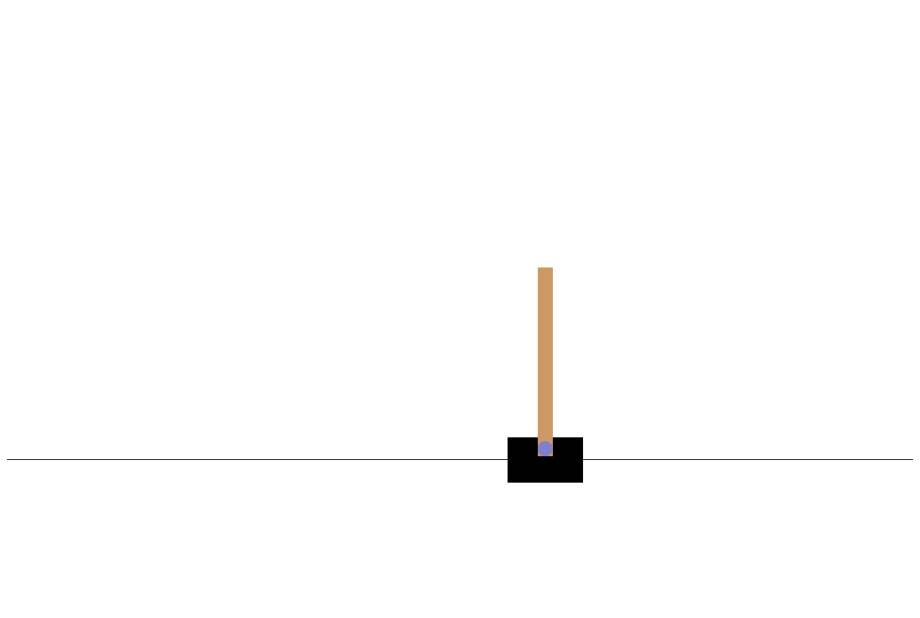

In [27]:
display_frames_as_gif(frames, output='./save/cart_pole_q_learrning.gif')